In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.linalg import cond
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import ShuffleSplit, cross_val_score
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from load_data import loadData
from QSAR_Lab.Modeling.spliter import split_x_to_n
from QSAR_Lab.Modeling import aplicability_domain

In [2]:
file = open("./FiltredModels/filtred.txt")
x_file_name = "./Data/My_Selected_X_srednia_vertical.xlsx"

In [3]:
def linear(x,a,b):
    return a*x +b

In [4]:
# Parameters reader

line = 1116 # Git 

content = file.readlines()
file.close()
param = content[line-1].split()

rand = int(param[2].replace(",",""))
rand_cv = int(param[5])

In [5]:
rand

390

In [6]:
rand_cv

4759

In [7]:
# # Load Data
# X_train, X_test, y_train, y_test = loadData()

# Load Data
X = pd.read_excel(x_file_name, sheet_name=0, index_col=0)
y = pd.read_excel("./Data/data_dummies.xlsx", index_col=0, sheet_name=2)
X_train, X_test, y_train, y_test = split_x_to_n(X, y, sort=True)
print(f"Train set:   {len(X_train.index)}")
print(f"Descriptors: {len(X_train.columns)}")

Train set:   200
Descriptors: 15


In [8]:
X

,Σ Pauling electronegativity / Å^2,HOMO eigenvalue (eV),LUMO eigenvalue (eV),Dipole moment (Debye),Quadrupole moment (1/3 of trace of diagonalized matrix Q) (Debye×Å),FDV (-. +)_mean(kcal/mol),FDH_horiz_mean,MW,ECC,UNIP,O%,ESOL,Hamaker,SAtot,Si
ALA_sio2quartz,1.13,-6.648,-6.302,68.177,-524.101,107.415,108.34,16.05,0,0,0.000000,-0.873726,4.44,62.200285,5.8304
ARG_sio2quartz,1.13,-6.648,-6.302,68.177,-524.101,107.415,108.34,103.20,29,11,0.000000,-0.202335,5.18,191.439382,23.5709
ASP_sio2quartz,1.13,-6.648,-6.302,68.177,-524.101,107.415,108.34,59.05,7,3,28.571429,-0.236015,5.63,100.284523,8.0416
CYS_sio2quartz,1.13,-6.648,-6.302,68.177,-524.101,107.415,108.34,48.12,2,1,0.000000,-0.657865,5.44,91.885727,6.7504
GLU_sio2quartz,1.13,-6.648,-6.302,68.177,-524.101,107.415,108.34,73.08,13,5,20.000000,-0.535767,5.07,126.361259,11.4568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASN_graphene_,1.17,-6.026,-5.597,0.013,-481.646,112.050,112.71,59.08,7,3,11.111111,0.084893,53.50,106.885275,10.5381
GLN_graphene_,1.17,-6.026,-5.597,0.013,-481.646,112.050,112.71,73.11,13,5,8.333333,-0.263944,50.62,132.962010,13.9533
LEU_graphene_,1.17,-6.026,-5.597,0.013,-481.646,112.050,112.71,58.14,7,3,0.000000,-1.879501,35.84,144.186633,16.0760
PRO_graphene_,1.17,-6.026,-5.597,0.013,-481.646,112.050,112.71,42.09,3,2,0.000000,-1.329676,40.27,78.230207,10.2456


0.8683378225846409
DecisionTreeRegressor(max_depth=3)
21


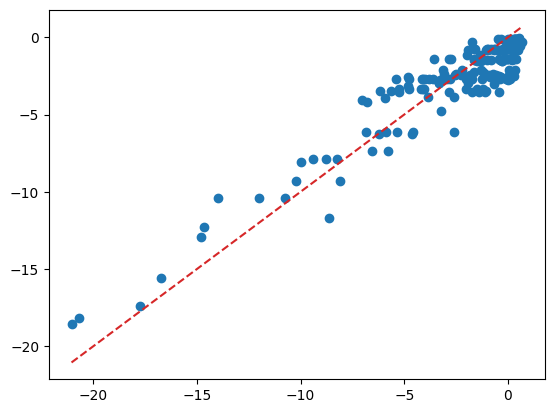

In [9]:
# Create Model
from sklearn.tree import DecisionTreeRegressor
my_base_model= DecisionTreeRegressor(max_depth=3)

model = AdaBoostRegressor(random_state=rand, n_estimators=100, estimator=my_base_model, loss="linear")
model.fit(np.array(X_train), y_train)
y_train_pred = model.predict(np.array(X_train))
y_test_pred = model.predict(np.array(X_test))

plt.scatter(y_train,y_train_pred)
plt.plot(y_train, y_train, c="tab:red", ls="--")
print(model.score(np.array(X_train), y_train))
print(model.estimator_)
print(len(model.estimators_))
plt.show()

In [10]:
# Cross-Validation
kfold = ShuffleSplit(n_splits=5, test_size=0.25, random_state=rand_cv)
scores = cross_val_score(model, X_train, y_train, cv=kfold)

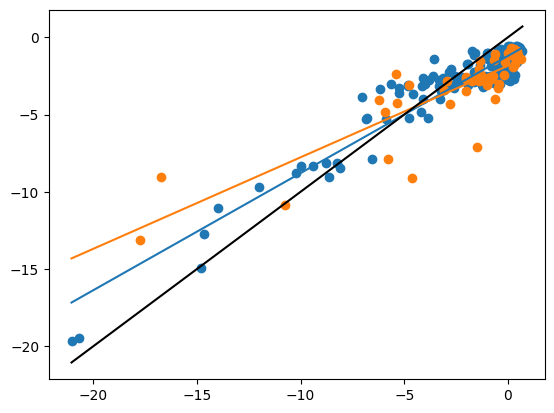

7.714999999999996


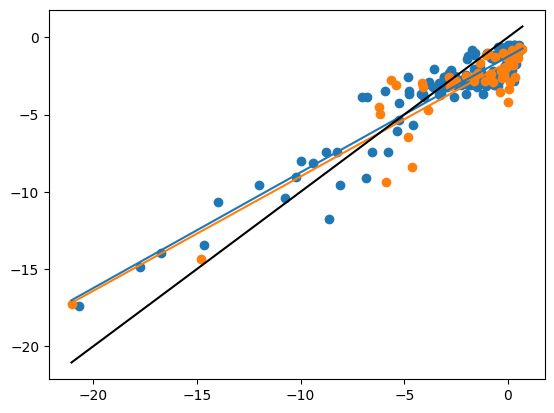

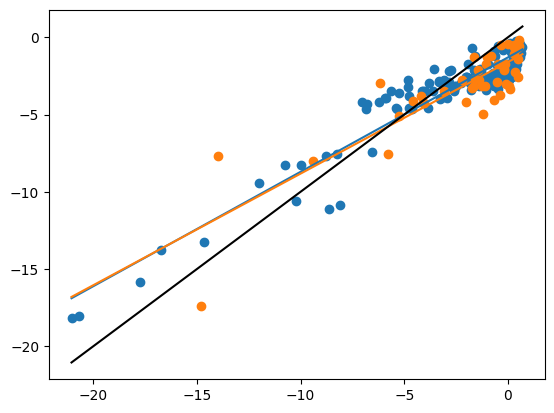

6.299393939393939


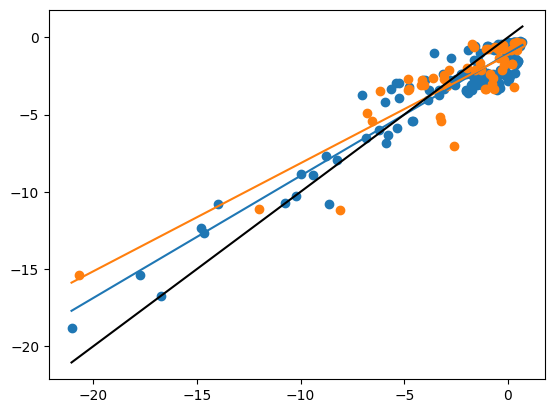

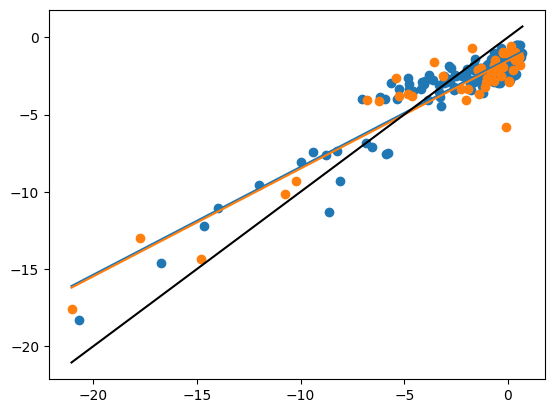

CV = 0.7224825083125914


In [11]:
X = np.array(X_train)
for train, test in kfold.split(X):
    X_tr, X_tst, y_tr, y_tst = (X[train], X[test], y_train[train], y_train[test])


    
    model_cv = AdaBoostRegressor(random_state=rand, n_estimators=100)
    model_cv.fit(X_tr, y_tr)

    y_tr_pred = model_cv.predict(X_tr)
    y_tst_pred = model_cv.predict(X_tst)
    
    popt_tr, pcov = curve_fit(linear, y_tr, y_tr_pred)
    popt_tst, pcov = curve_fit(linear, y_tst, y_tst_pred)

    plt.scatter(y_tr,y_tr_pred)
    plt.plot(y_train, linear(y_train, popt_tr[0],popt_tr[1]))
    
    plt.scatter(y_tst,y_tst_pred)
    plt.plot(y_train, linear(y_train, popt_tst[0],popt_tst[1]))
    
    plt.plot(y_train, y_train, c="black")
    
    plt.show()
    

    
    for i, j in zip(y_tst,y_tst_pred):
        if abs(i-j) > np.std(y_tst)*1.5:
            print(abs(i-j))
print(f"CV = {scores.mean()}")

# MODEL

In [12]:
popt_train, pcovtrn = curve_fit(linear, y_train, y_train_pred)
popt_test, pcovtst = curve_fit(linear, y_test, y_test_pred)

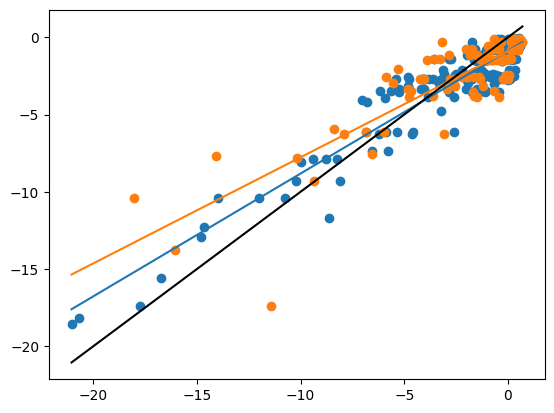

In [13]:
plt.scatter(y_train,y_train_pred)
plt.plot(y_train, linear(y_train, popt_train[0],popt_train[1]))

plt.scatter(y_test, y_test_pred)
plt.plot(y_train, linear(y_train, popt_test[0],popt_test[1]))

plt.plot(y_train, y_train, c="black")
plt.show()

In [14]:
print(f"TRAIN: = {model.score(np.array(X_train), y_train)}")
print(f" TEST: = {model.score(np.array(X_test), y_test)}")

TRAIN: = 0.8683378225846409
 TEST: = 0.7310557890096285


In [15]:
print("----- Train -----")
for i, j in zip(y_train,y_train_pred):
    if abs(i-j) > 4:
        print(abs(i-j))
print("\n----- Test -----")
for i, j in zip(y_test,y_test_pred):
    if abs(i-j) > np.std(y_test)*1.5:
        print(abs(i-j))

----- Train -----

----- Test -----
7.621904761904764
6.403
5.970000000000002


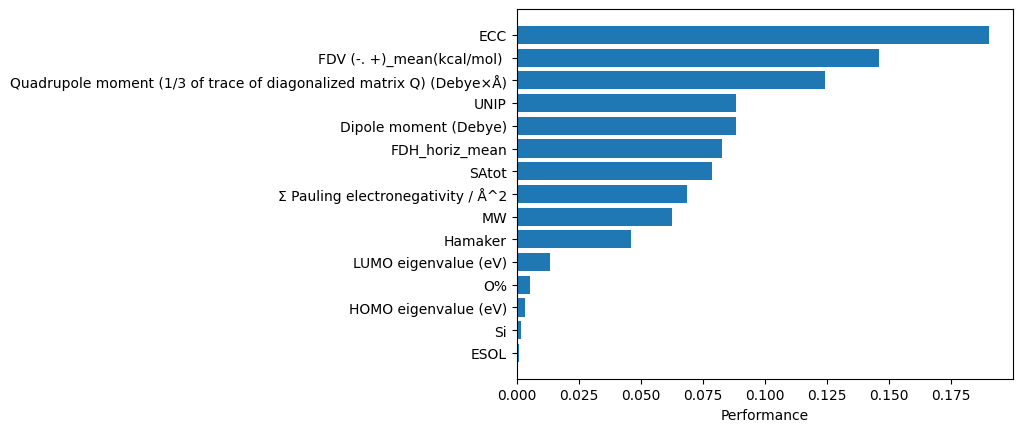

In [16]:
imp = model.feature_importances_[:20]
name = list(X_train.columns)[:20]

df = pd.DataFrame(imp, index=name, columns=["Importance"])
df.sort_values(by="Importance", inplace=True, ascending=False)

df.sort_values(by="Importance", inplace=True, ascending=False)

fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 12})

# Example data
people = df.index
y_pos = np.arange(len(df))
performance = df["Importance"]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
# plt.tight_layout()
plt.show()

h_k = 0.24


/var/folders/w6/mcqdxvns5bj_x9g4q0fy_wqr0000gn/T/ipykernel_10768/908903029.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


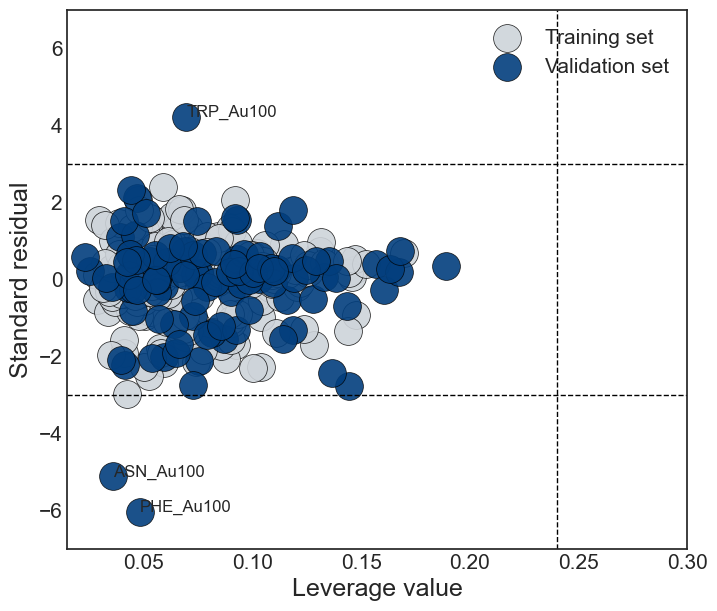

In [17]:
x1, y1, x2, y2, h_k = aplicability_domain.Williams_plot(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)


plt.figure(figsize=(8,7))
plt.style.use('seaborn-white')
# plt.grid(color='grey', linestyle='-', linewidth=0.2)

plt.scatter(x1, y1, s=400, linewidths=0.5, edgecolors='black',facecolors='#ced4da', alpha=0.9, label="Training set")
plt.scatter(x2, y2, s=400, linewidths=0.5, edgecolors='black', facecolors='#023e7d', alpha=0.9, label="Validation set")


plt.ylim(-7, 7)
plt.xlim(right=h_k+0.25*h_k)

plt.axhline(y=3, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-3, color='black', linestyle='--', linewidth=1)
plt.axvline(x=h_k, color='black', linestyle='--', linewidth=1)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.legend(fontsize=15, loc='upper left')
plt.legend(fontsize=15, loc='upper right')
plt.xlabel('Leverage value', fontsize=18)
plt.ylabel('Standard residual', fontsize=18)


for i, txt in enumerate(X_train.index):
    if x1[i] > h_k or abs(y1[i]) > 3:
        plt.annotate(txt, (x1[i], y1[i]))
        
for i, txt in enumerate(X_test.index):
    if x2[i] > h_k or abs(y2[i]) > 3:
        plt.annotate(txt, (x2[i], y2[i]))
        
plt.show()
